### Importing Packages

In [1]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.impute import SimpleImputer
import pandas as pd
import numpy as np
import seaborn as sns 
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import pandas as pd
import matplotlib.ticker as mtick  
import matplotlib.pyplot as plt
import warnings

### (1) Data Exploration

In [2]:
# Reading the data
df = pd.read_csv('C:/Users/write/Documents/AltUni/train(1).csv')

In [3]:
# To know the shape of data frame
df.shape

(5282, 21)

In [4]:
# Displays Top 5 rows of data frame
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,3704-IEAXF,Female,0,Yes,Yes,72,No,No phone service,DSL,No,...,No,Yes,Yes,Yes,Two year,No,Credit card (automatic),53.65,3784,0
1,5175-AOBHI,Female,0,No,No,4,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,46.00,193.6,1
2,6922-NCEDI,Male,0,No,Yes,56,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,21.20,1238.65,0
3,3143-ILDAL,Male,0,No,No,56,Yes,Yes,Fiber optic,No,...,No,Yes,No,Yes,Month-to-month,Yes,Electronic check,94.45,5124.6,1
4,0872-NXJYS,Female,0,No,No,9,Yes,No,Fiber optic,No,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,79.55,723.4,1


In [5]:
# To know the information about the data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5282 non-null   object 
 1   gender            5282 non-null   object 
 2   SeniorCitizen     5282 non-null   int64  
 3   Partner           5282 non-null   object 
 4   Dependents        5282 non-null   object 
 5   tenure            5282 non-null   int64  
 6   PhoneService      5282 non-null   object 
 7   MultipleLines     5282 non-null   object 
 8   InternetService   5282 non-null   object 
 9   OnlineSecurity    5282 non-null   object 
 10  OnlineBackup      5282 non-null   object 
 11  DeviceProtection  5282 non-null   object 
 12  TechSupport       5282 non-null   object 
 13  StreamingTV       5282 non-null   object 
 14  StreamingMovies   5282 non-null   object 
 15  Contract          5282 non-null   object 
 16  PaperlessBilling  5282 non-null   object 


#### Data frame contains 5282 rows and 21 columns

In [6]:
# Convert empty strings to NaN and convert the column to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [7]:
# To know the data types of the columns in the data frame
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

In [8]:
## gives the description of each  numeric variable in the dataset
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
count,5282.000000,5282.000000,5282.000000,5274.000000,5282.000000
mean,0.162060,32.362931,64.856626,2295.560343,0.265430
std,0.368541,24.627623,30.171934,2285.155724,0.441604
min,0.000000,0.000000,18.400000,18.850000,0.000000
25%,0.000000,9.000000,35.450000,395.162500,0.000000
50%,0.000000,29.000000,70.500000,1387.400000,0.000000
75%,0.000000,55.750000,89.987500,3847.062500,1.000000
max,1.000000,72.000000,118.750000,8684.800000,1.000000


##### (1) Mean Tenure = 32 months approx. and Max. Tenure = 72 months
##### (2) Mean Monthly Charges = 65 approx. and Max. Monthly Charges = 119 approx.
##### (3) Mean Total Charges = 2296 approx. and Max. Monthly Charges = 8685 approx.

In [9]:
## checking for duplicates in the dataset
duplicate = df.duplicated()
duplicate

0       False
1       False
2       False
3       False
4       False
        ...  
5277    False
5278    False
5279    False
5280    False
5281    False
Length: 5282, dtype: bool

In [10]:
sum(duplicate)

0

##### There are no duplicates present in the dataset

In [11]:
# Duplicates in Columns
# We can use correlation coefficient values to identify columns which have duplicate information
d1 = df.corr()

In [12]:
d1

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
SeniorCitizen,1.000000,0.020620,0.219771,0.104350,0.147522
tenure,0.020620,1.000000,0.259354,0.830254,-0.343189
MonthlyCharges,0.219771,0.259354,1.000000,0.654620,0.197351
TotalCharges,0.104350,0.830254,0.654620,1.000000,-0.192984
Churn,0.147522,-0.343189,0.197351,-0.192984,1.000000


##### (i) There is a low level direct correlation between Churn and Senior Citizen
##### (ii) There is a low level inverse correlation between Churn and tenure
##### (iii) There is a low level direct correlation between Churn and Monthly Charges
##### (iv) There is a low level inverse correlation between Churn and Total Charges

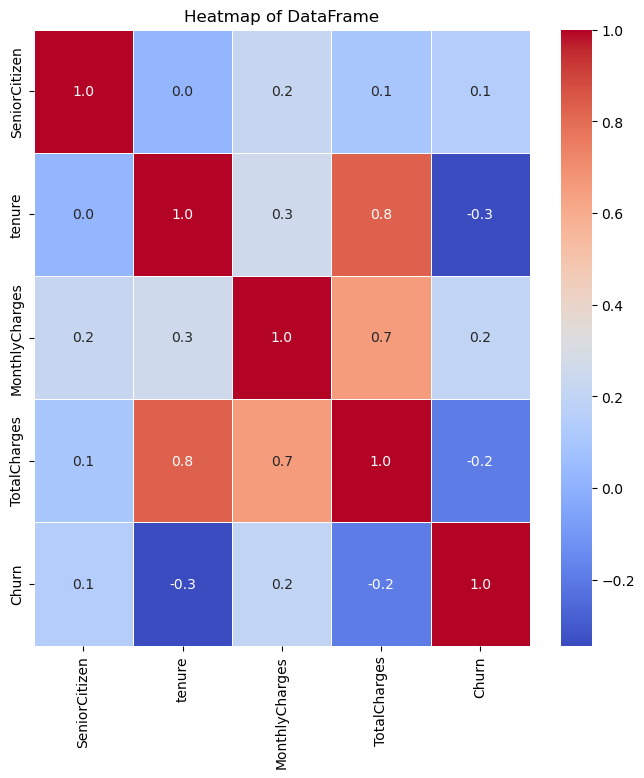

In [13]:
plt.figure(figsize=(8, 8))  # Adjust the figure size as needed
sns.heatmap(d1, cmap='coolwarm', annot=True, fmt='.1f', linewidths=.5)

plt.title('Heatmap of DataFrame')
plt.show()

In [14]:
# Check for count of NA's in each column
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        8
Churn               0
dtype: int64

##### There are 8 null values in TotalCharges column of the dataset.

In [15]:
# Deleting Unwanted columns in the data frame
df.drop('customerID', axis=1, inplace=True)

In [16]:
# Frequencies of Churn variable
df['Churn'].value_counts()

0    3880
1    1402
Name: Churn, dtype: int64

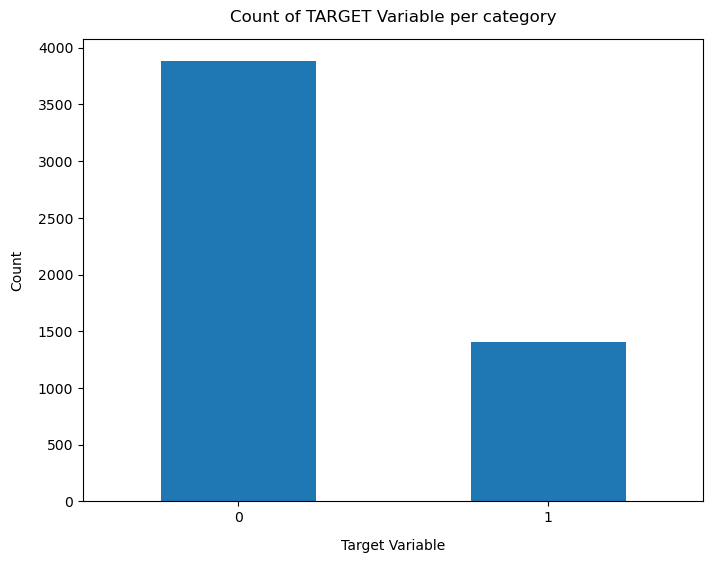

In [17]:
df['Churn'].value_counts().plot(kind='bar', figsize=(8, 6))
plt.xticks(rotation=0)
plt.xlabel("Target Variable", labelpad=10)
plt.ylabel("Count", labelpad=10)
plt.title("Count of TARGET Variable per category", y=1.02);

#### ** From the above diagram the customers who are not churned are more than the customers who churned.

In [18]:
# Relative frequencies of Churn variable
df['Churn'].value_counts()/len(df['Churn'])

0    0.73457
1    0.26543
Name: Churn, dtype: float64

## (2) Data Preprocessing

In [19]:
categorical_features = ["gender","SeniorCitizen","Partner","Dependents","MultipleLines","InternetService","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies","Contract","PaperlessBilling","PaymentMethod"]
numerical_features = ["tenure", "MonthlyCharges", "TotalCharges"]
target = "Churn"

In [20]:
df.skew(numeric_only= True)

SeniorCitizen     1.834632
tenure            0.244146
MonthlyCharges   -0.218986
TotalCharges      0.951766
Churn             1.062759
dtype: float64

In [21]:
# Assuming df is your DataFrame
numeric_columns = df.select_dtypes(include='number')  # Select numeric columns
correlation_matrix = numeric_columns.corr()  # Calculate the correlation matrix

In [22]:
# Print or use the correlation matrix as needed
print(correlation_matrix)

                SeniorCitizen    tenure  MonthlyCharges  TotalCharges  \
SeniorCitizen        1.000000  0.020620        0.219771      0.104350   
tenure               0.020620  1.000000        0.259354      0.830254   
MonthlyCharges       0.219771  0.259354        1.000000      0.654620   
TotalCharges         0.104350  0.830254        0.654620      1.000000   
Churn                0.147522 -0.343189        0.197351     -0.192984   

                   Churn  
SeniorCitizen   0.147522  
tenure         -0.343189  
MonthlyCharges  0.197351  
TotalCharges   -0.192984  
Churn           1.000000  


In [23]:
###############Numerical features distribution#########
df[numerical_features].describe()

,tenure,MonthlyCharges,TotalCharges
count,5282.000000,5282.000000,5274.000000
mean,32.362931,64.856626,2295.560343
std,24.627623,30.171934,2285.155724
min,0.000000,18.400000,18.850000
25%,9.000000,35.450000,395.162500
50%,29.000000,70.500000,1387.400000
75%,55.750000,89.987500,3847.062500
max,72.000000,118.750000,8684.800000


array([[<AxesSubplot:title={'center':'tenure'}>,
        <AxesSubplot:title={'center':'MonthlyCharges'}>],
       [<AxesSubplot:title={'center':'TotalCharges'}>, <AxesSubplot:>]],
      dtype=object)

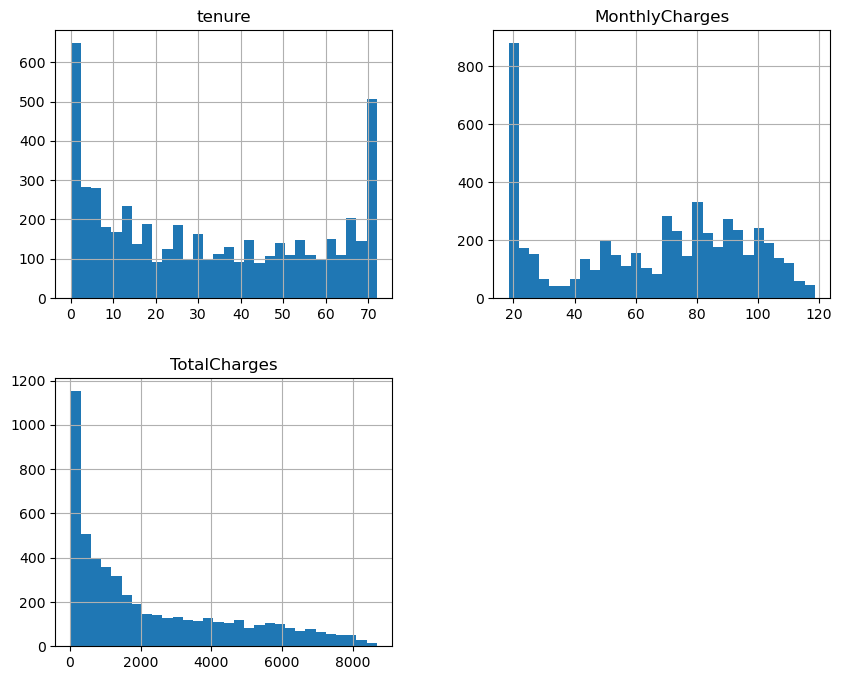

In [24]:
df[numerical_features].hist(bins=30, figsize=(10, 8))

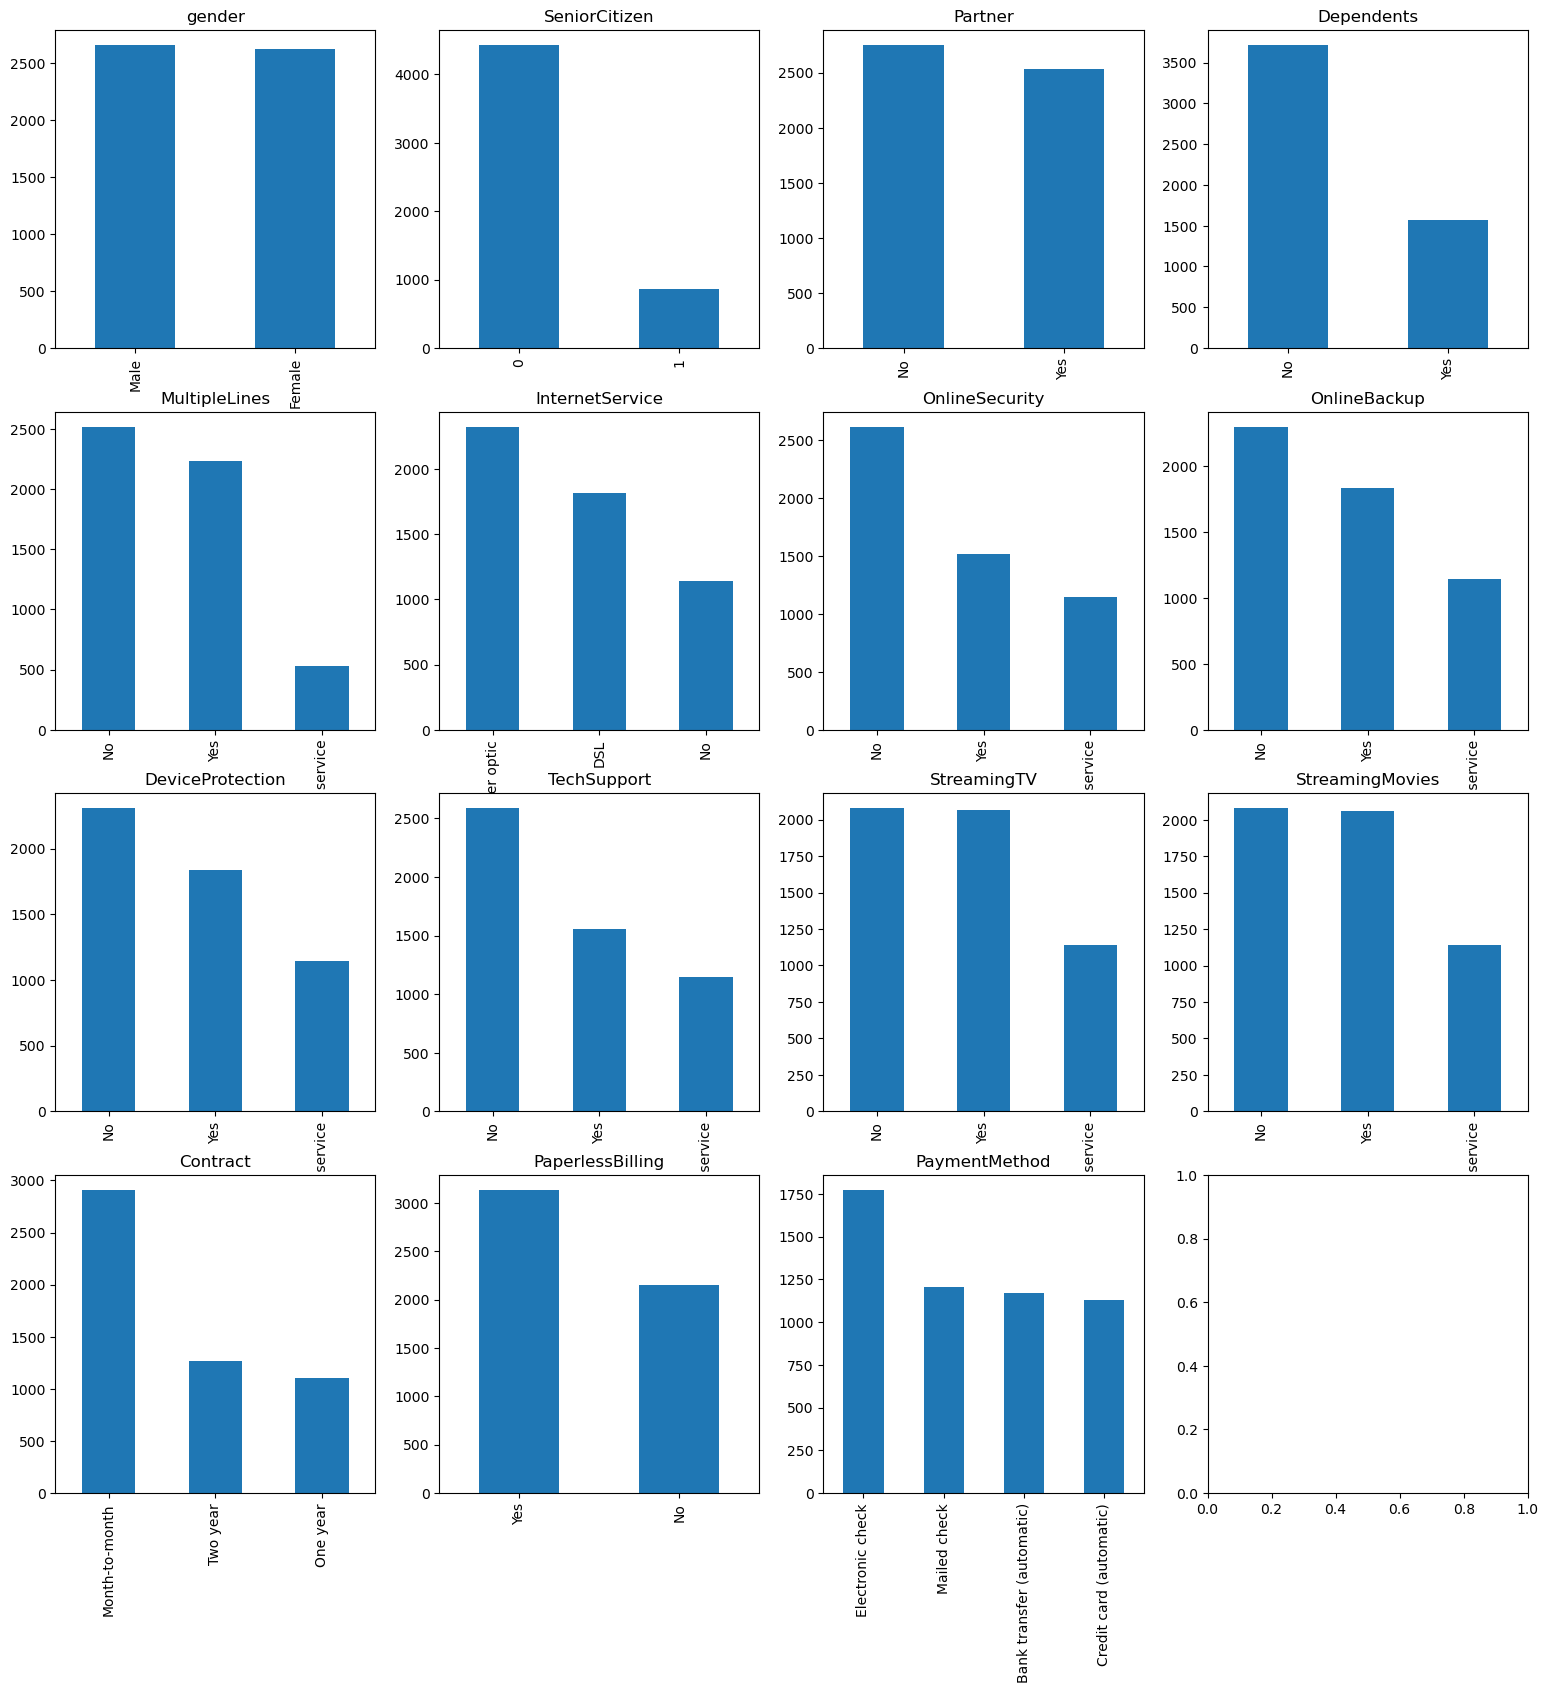

In [25]:
#########Categorical feature distribution#########

ROWS, COLS = 4, 4
fig, ax = plt.subplots(ROWS,COLS, figsize=(19,19))
row, col = 0, 0,
for i, categorical_feature in enumerate(categorical_features):
    if col == COLS - 1:
        row += 1
    col = i % COLS
    df[categorical_feature].value_counts().plot(kind='bar', ax=ax[row, col]).set_title(categorical_feature)

Text(0.5, 1.0, 'churned')

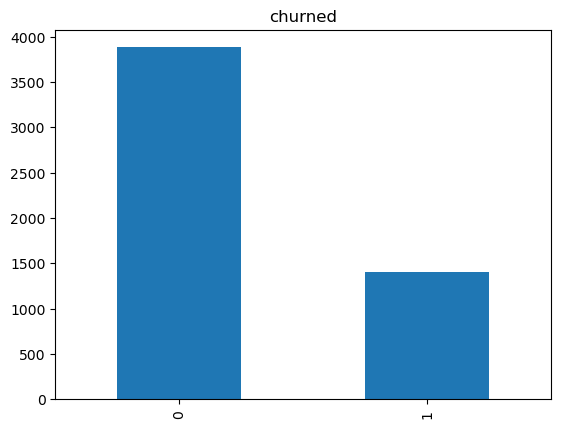

In [26]:
df[target].value_counts().plot(kind='bar').set_title('churned')

## (3) Feature Engineering

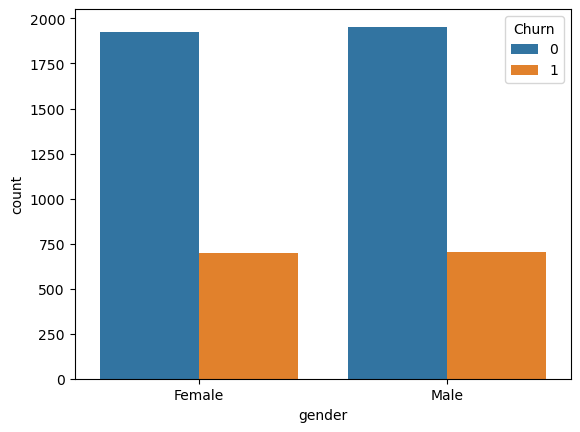

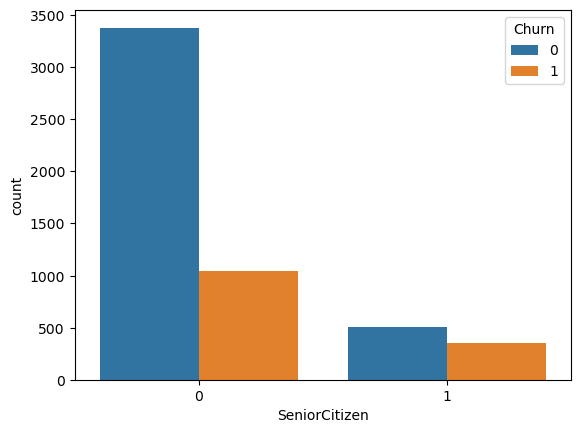

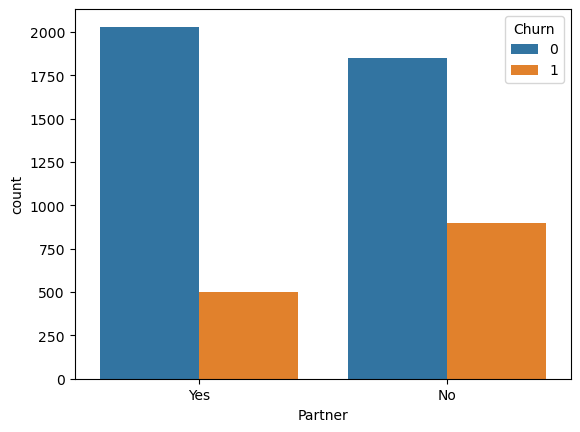

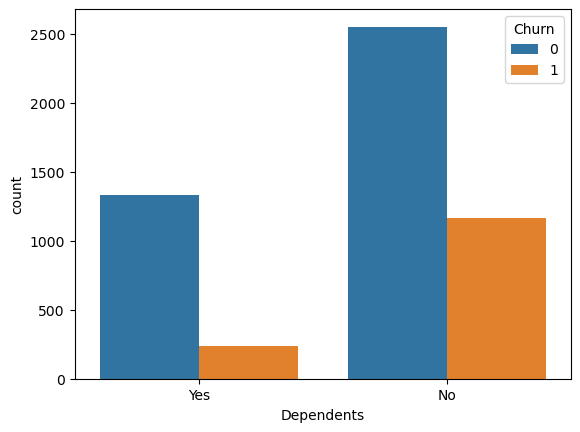

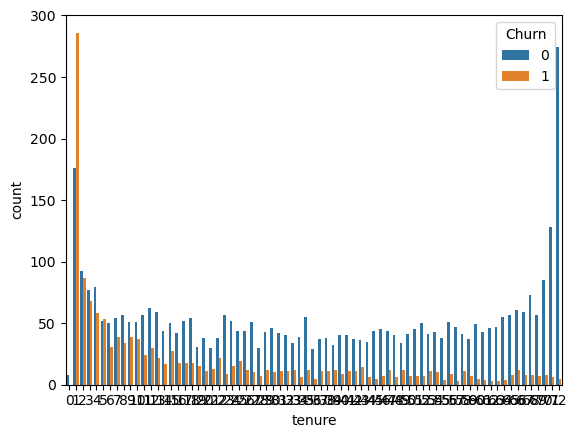

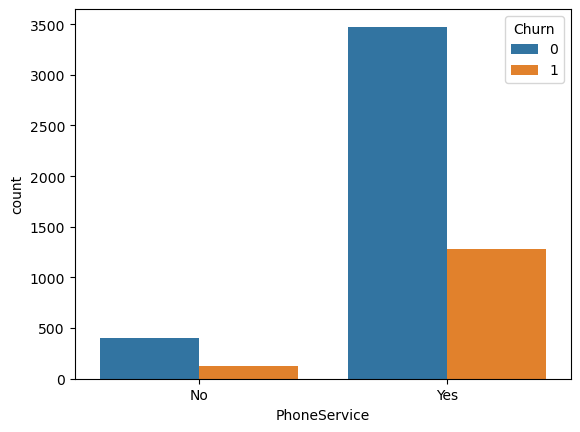

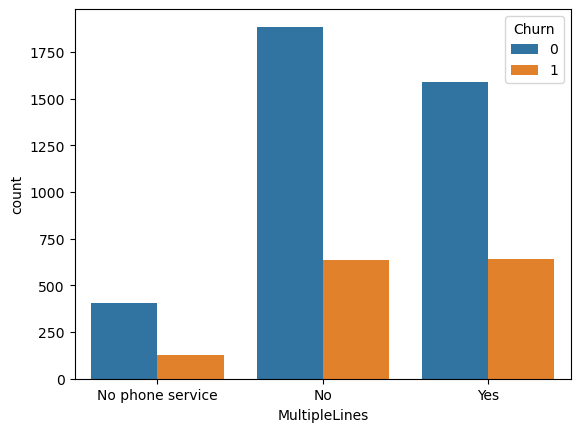

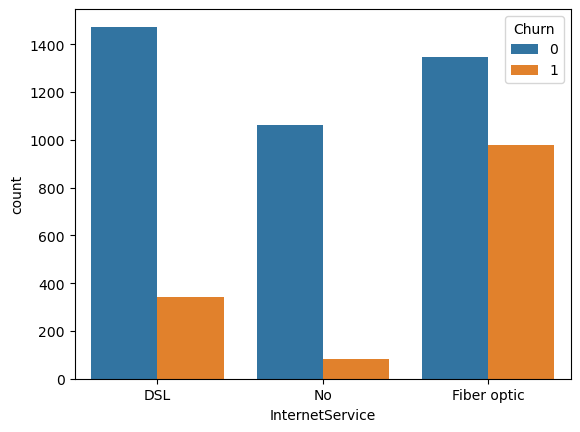

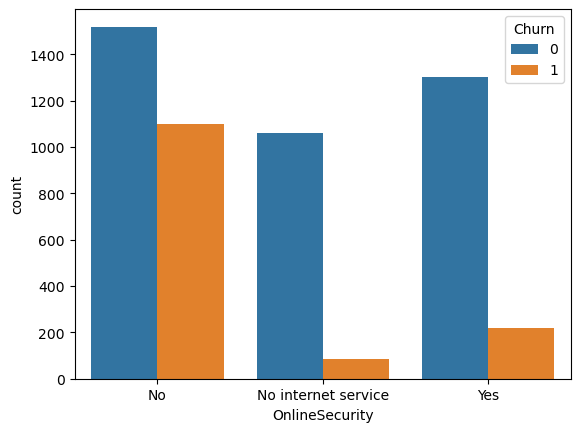

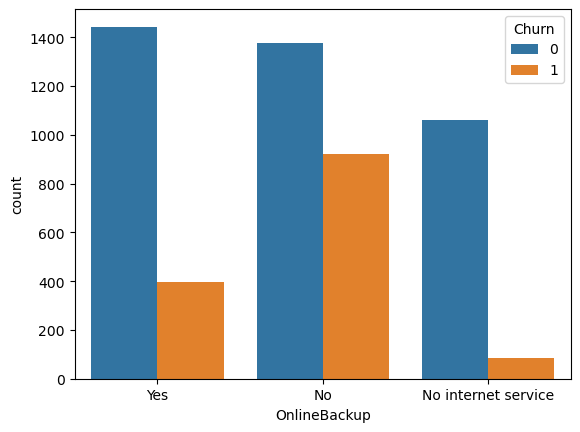

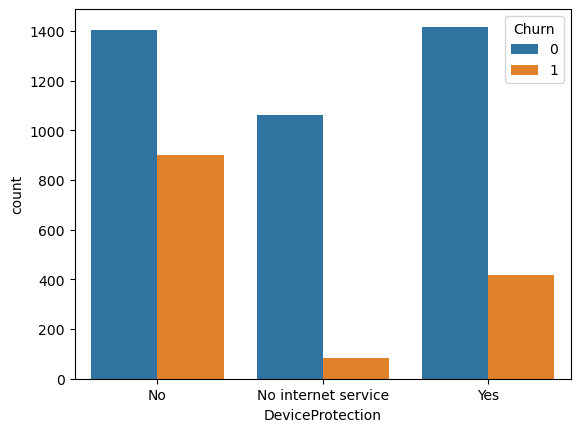

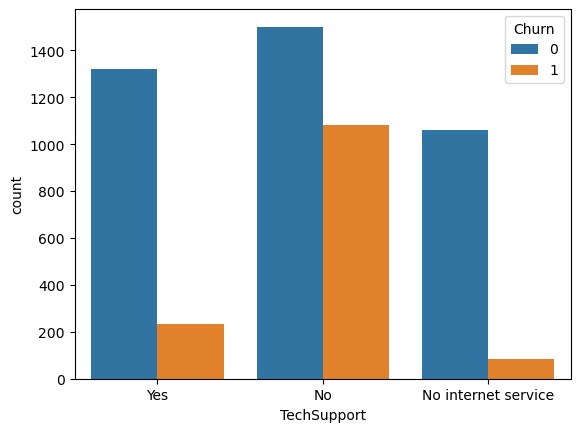

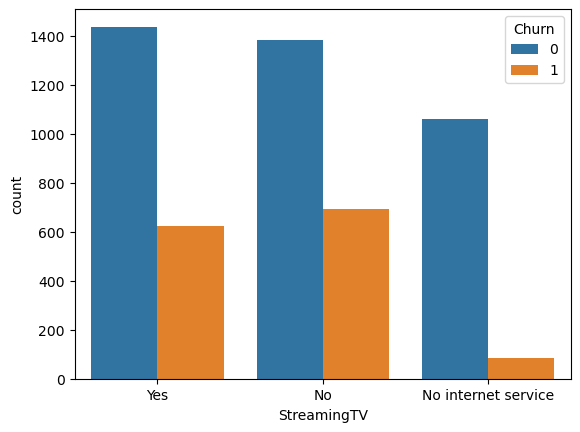

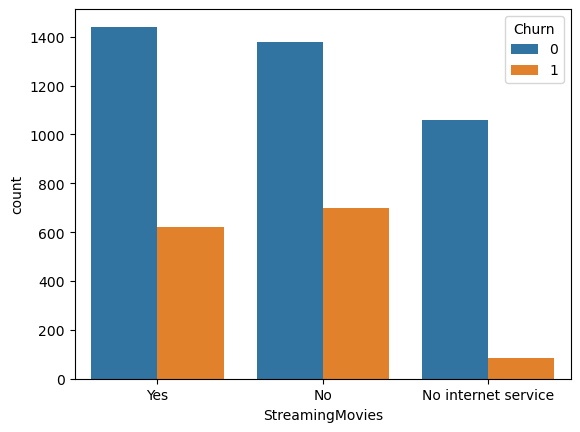

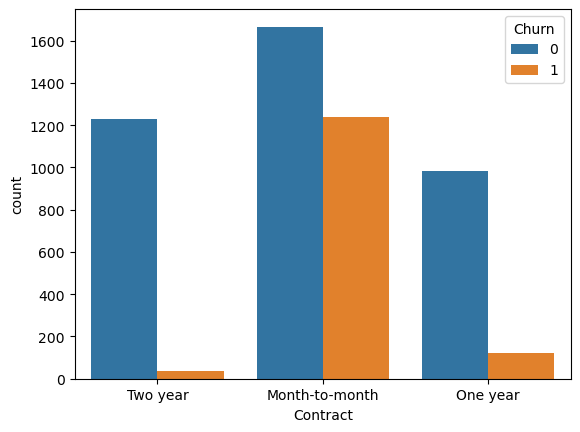

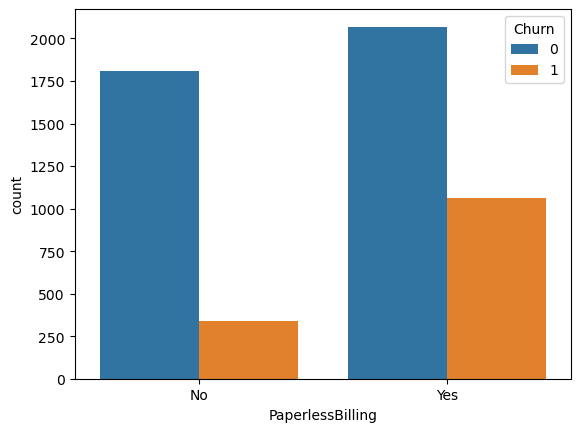

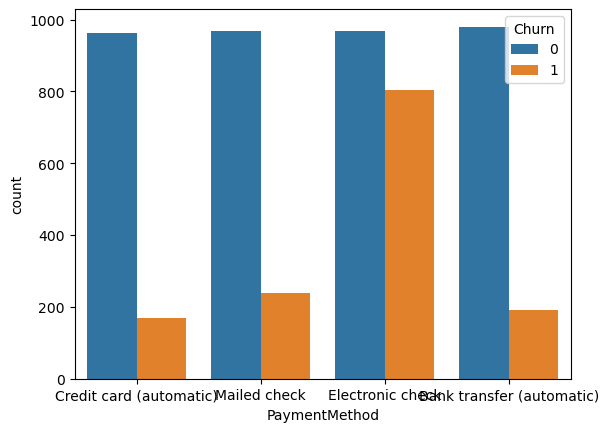

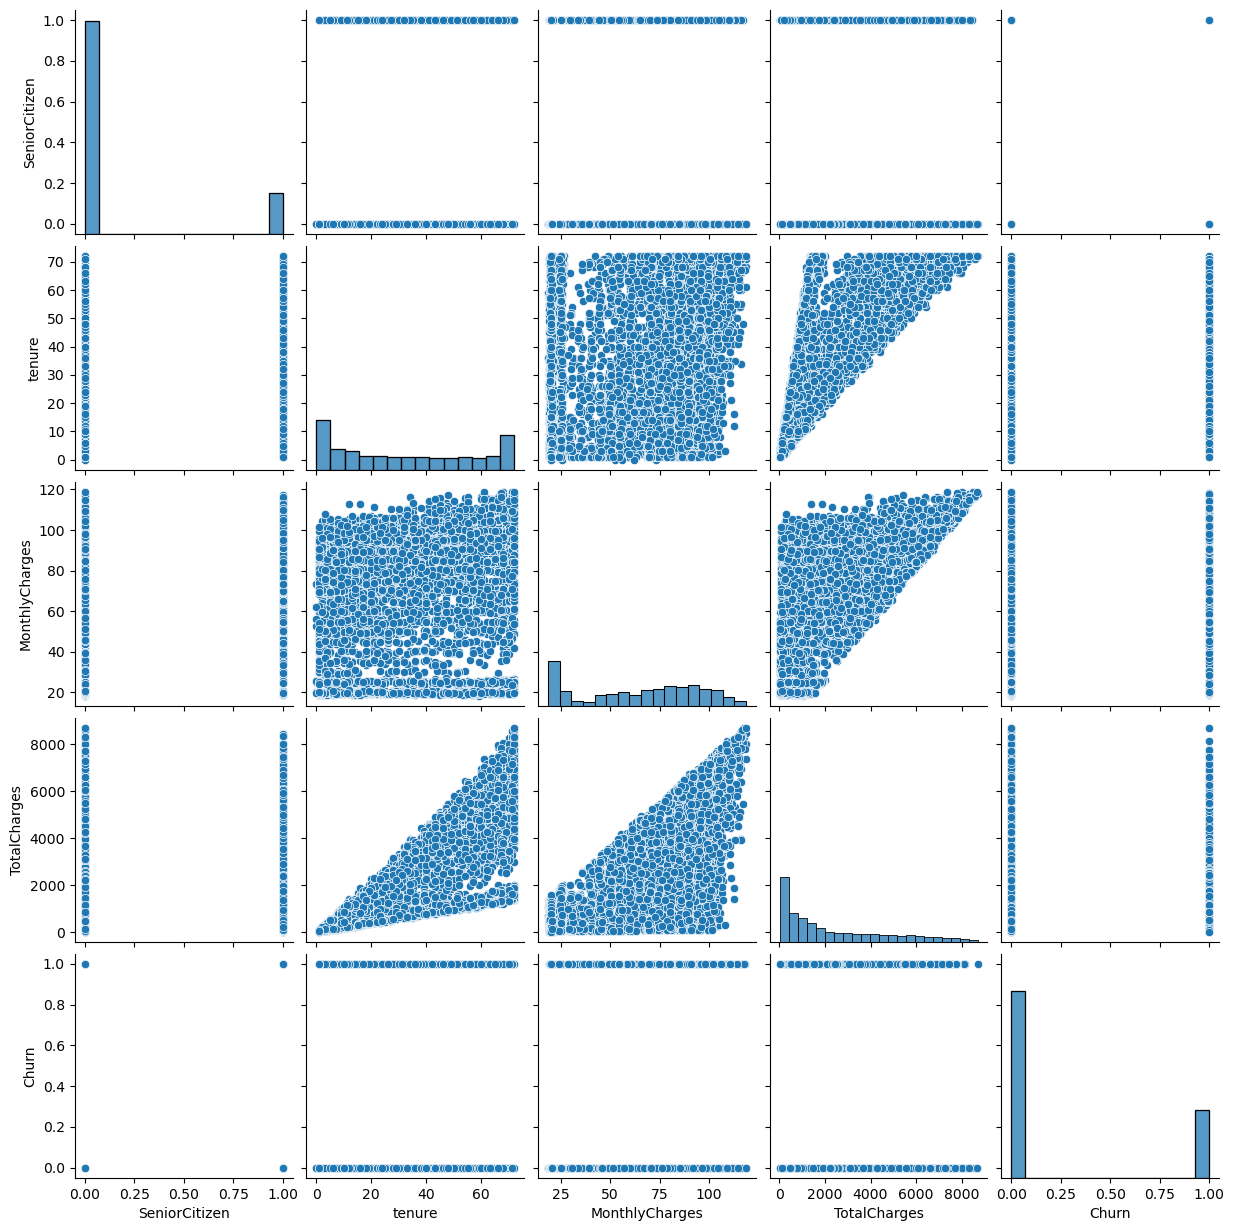

In [27]:
for i, predictor in enumerate(df.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges'])):
    plt.figure(i)
    sns.countplot(data=df, x=predictor, hue='Churn')

sns.pairplot(df)

In [28]:
##########On Hot Encoding##########

df1=pd.get_dummies(data=df,columns=['gender', 'Partner', 'Dependents', 
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'], drop_first=True)

In [29]:
df1.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_1
0,0,72,53.65,3784.00,0,1,1,0,1,0,...,1,0,1,0,1,0,1,0,0,0
1,0,4,46.00,193.60,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,1
2,0,56,21.20,1238.65,1,0,1,1,0,0,...,0,1,0,1,0,1,0,0,1,0
3,0,56,94.45,5124.60,1,0,0,1,0,1,...,0,0,1,0,0,1,0,1,0,1
4,0,9,79.55,723.40,0,0,0,1,0,0,...,0,0,1,0,0,1,0,1,0,1


In [30]:
df1.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'Churn_1'],
      dtype='object')

In [31]:
################Rearranging Columns##########

df1 = df1[['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
        'gender_Male', 'Partner_Yes', 'Dependents_Yes',
       'PhoneService_Yes', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No internet service',
       'TechSupport_Yes', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check','Churn_1']]

In [32]:
df1.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_1
0,0,72,53.65,3784.00,0,1,1,0,1,0,...,1,0,1,0,1,0,1,0,0,0
1,0,4,46.00,193.60,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,1
2,0,56,21.20,1238.65,1,0,1,1,0,0,...,0,1,0,1,0,1,0,0,1,0
3,0,56,94.45,5124.60,1,0,0,1,0,1,...,0,0,1,0,0,1,0,1,0,1
4,0,9,79.55,723.40,0,0,0,1,0,0,...,0,0,1,0,0,1,0,1,0,1


In [33]:
df1.shape

(5282, 31)

In [34]:
from sklearn.impute import SimpleImputer

In [35]:
# Create an instance of SimpleImputer to replace missing values with the mean
imputer = SimpleImputer(missing_values=np.nan, strategy="mean")

In [36]:
# Fit and transform the 'TotalCharges' column
df1["TotalCharges"] = imputer.fit_transform(df1["TotalCharges"].values.reshape(-1, 1))

In [37]:
########Feature Scaling########

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(df1.drop(['Churn_1'],axis = 1))
scaled_features = scaler.transform(df1.drop('Churn_1',axis = 1))

In [38]:
#############Feature Selection#############3

from sklearn.model_selection import train_test_split
X = scaled_features
Y = df1['Churn_1']
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3,random_state=44)

## (4) Model Building and Model Evaluation

## Logistic Regression

In [39]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
y_pred_lr = logreg.predict(X_test)

In [40]:
log_train = round(logreg.score(X_train, Y_train) * 100, 2)
log_accuracy = round(accuracy_score(y_pred_lr, Y_test) * 100, 2)

Training Accuracy    : 80.85 %
Model Accuracy Score : 80.13 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.85      0.89      0.87      1155
           1       0.65      0.57      0.61       430

    accuracy                           0.80      1585
   macro avg       0.75      0.73      0.74      1585
weighted avg       0.79      0.80      0.80      1585

--------------------------------------------------------


C:\Users\write\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'Confusion Matrix')

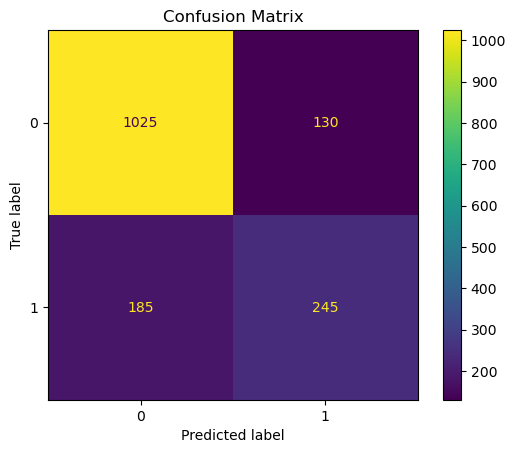

In [41]:
print("Training Accuracy    :", log_train, "%")
print("Model Accuracy Score :", log_accuracy, "%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n", classification_report(Y_test, y_pred_lr))
print("\033[1m--------------------------------------------------------\033[0m")
plot_confusion_matrix(logreg, X_test, Y_test)
plt.title('Confusion Matrix')

## Decision Tree Classifier

In [42]:
decision = DecisionTreeClassifier()
decision.fit(X_train, Y_train)
y_pred_dec = decision.predict(X_test)

In [43]:
decision_train = round(decision.score(X_train, Y_train) * 100, 2)
decision_accuracy = round(accuracy_score(y_pred_dec, Y_test) * 100, 2)

Training Accuracy    : 99.89 %
Model Accuracy Score : 73.0 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.82      0.81      0.81      1155
           1       0.50      0.51      0.51       430

    accuracy                           0.73      1585
   macro avg       0.66      0.66      0.66      1585
weighted avg       0.73      0.73      0.73      1585

--------------------------------------------------------


C:\Users\write\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'Confusion Matrix')

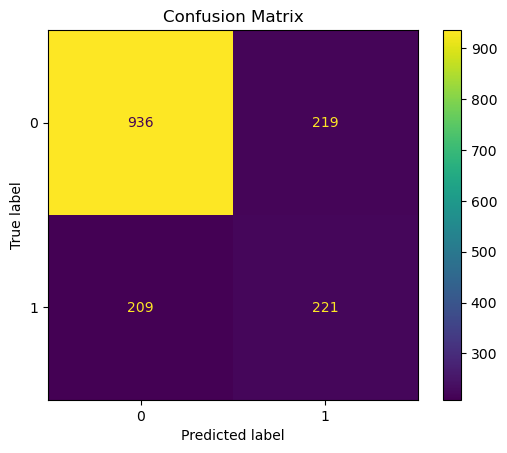

In [44]:
print("Training Accuracy    :", decision_train, "%")
print("Model Accuracy Score :", decision_accuracy, "%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n", classification_report(Y_test, y_pred_dec))
print("\033[1m--------------------------------------------------------\033[0m")
plot_confusion_matrix(decision, X_test, Y_test)
plt.title('Confusion Matrix')

## Random Forest Classifier

In [45]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
y_pred_rf = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)

0.9989180416553962

In [46]:
random_forest_train = round(random_forest.score(X_train, Y_train) * 100, 2)
random_forest_accuracy = round(accuracy_score(y_pred_rf, Y_test) * 100, 2)

Training Accuracy    : 99.89 %
Model Accuracy Score : 79.12 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.83      0.90      0.86      1155
           1       0.65      0.50      0.57       430

    accuracy                           0.79      1585
   macro avg       0.74      0.70      0.71      1585
weighted avg       0.78      0.79      0.78      1585

--------------------------------------------------------


C:\Users\write\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'Confusion Matrix')

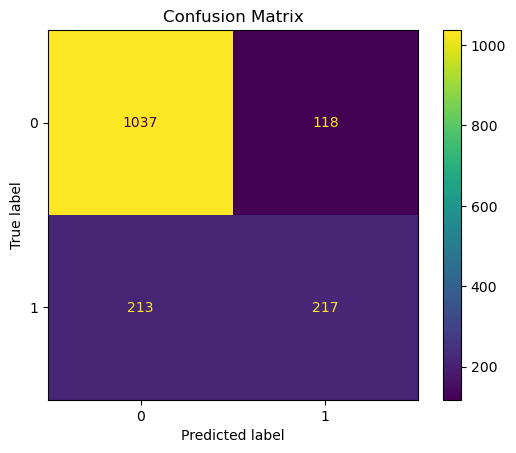

In [47]:
print("Training Accuracy    :", random_forest_train, "%")
print("Model Accuracy Score :", random_forest_accuracy, "%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n", classification_report(Y_test, y_pred_rf))
print("\033[1m--------------------------------------------------------\033[0m")
plot_confusion_matrix(random_forest, X_test, Y_test)
plt.title('Confusion Matrix')

## Support Vector Machines

In [48]:
svc = SVC()
svc.fit(X_train, Y_train)
y_pred_svc = svc.predict(X_test)

In [49]:
svc_train = round(svc.score(X_train, Y_train) * 100, 2)
svc_accuracy = round(accuracy_score(y_pred_svc, Y_test) * 100, 2)

Training Accuracy    : 82.26 %
Model Accuracy Score : 80.57 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.84      0.91      0.87      1155
           1       0.69      0.52      0.59       430

    accuracy                           0.81      1585
   macro avg       0.76      0.72      0.73      1585
weighted avg       0.80      0.81      0.80      1585

--------------------------------------------------------


C:\Users\write\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'Confusion Matrix')

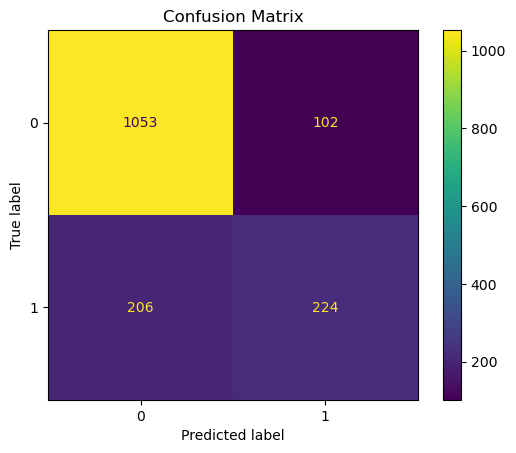

In [50]:
print("Training Accuracy    :", svc_train, "%")
print("Model Accuracy Score :", svc_accuracy, "%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n", classification_report(Y_test, y_pred_svc))
print("\033[1m--------------------------------------------------------\033[0m")
plot_confusion_matrix(svc, X_test, Y_test)
plt.title('Confusion Matrix')

In [51]:
###MODEL BUILDING
models = pd.DataFrame({
    'Model': [
        'Support Vector Machines', 'Logistic Regression', 'Random Forest',
        'Decision Tree'
    ],

    'Training Accuracy':
    [log_train, svc_train, decision_train, random_forest_train],

    'Model Accuracy Score': [
        log_accuracy, svc_accuracy, decision_accuracy, random_forest_accuracy
    ]
})

In [52]:
warnings.filterwarnings("ignore")

In [53]:
models.sort_values(by='Model Accuracy Score', ascending=False).style.background_gradient(
    cmap='coolwarm').hide_index().set_properties(**{
        'font-family': 'Lucida Calligraphy',
        'color': 'LigntGreen',
        'font-size': '15px'
    }).set_precision(2)

Model,Training Accuracy,Model Accuracy Score
Logistic Regression,82.26,80.57
Support Vector Machines,80.85,80.13
Decision Tree,99.89,79.12
Random Forest,99.89,73.00


## (5) Prediction

In [54]:
df2 = pd.read_csv('C:/Users/write/Documents/AltUni/active_customers.csv')

In [55]:
df2.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,5343-SGUBI,Female,0,No,No,52,Yes,Yes,Fiber optic,No,Yes,No,No,No,No,One year,Yes,Mailed check,80.20,4297.6
1,5442-BXVND,Female,0,Yes,Yes,33,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Bank transfer (automatic),24.25,838.5
2,6434-TTGJP,Male,0,Yes,Yes,10,No,No phone service,DSL,Yes,Yes,Yes,Yes,No,Yes,Two year,No,Credit card (automatic),53.70,521
3,1628-BIZYP,Male,0,No,No,1,Yes,No,Fiber optic,No,Yes,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.00,85
4,0298-XACET,Male,0,Yes,Yes,52,No,No phone service,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,50.20,2554


In [56]:
df2.drop('customerID', axis=1, inplace=True)

In [57]:
df3=pd.get_dummies(data=df2,columns=['gender', 'Partner', 'Dependents', 
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'], drop_first=True)

In [58]:
df3.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,52,80.20,4297.6,0,0,0,1,0,1,...,0,0,0,0,1,0,1,0,0,1
1,0,33,24.25,838.5,0,1,1,1,0,1,...,1,0,1,0,0,0,0,0,0,0
2,0,10,53.70,521,1,1,1,0,1,0,...,0,0,0,1,0,1,0,1,0,0
3,0,1,85.00,85,1,0,0,1,0,0,...,0,0,0,1,0,0,1,0,1,0
4,0,52,50.20,2554,1,1,1,0,1,0,...,0,1,0,0,0,1,0,0,0,1


In [59]:
df3 = df3[['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
        'gender_Male', 'Partner_Yes', 'Dependents_Yes',
       'PhoneService_Yes', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No internet service',
       'TechSupport_Yes', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']]

In [60]:
df3.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,52,80.20,4297.6,0,0,0,1,0,1,...,0,0,0,0,1,0,1,0,0,1
1,0,33,24.25,838.5,0,1,1,1,0,1,...,1,0,1,0,0,0,0,0,0,0
2,0,10,53.70,521,1,1,1,0,1,0,...,0,0,0,1,0,1,0,1,0,0
3,0,1,85.00,85,1,0,0,1,0,0,...,0,0,0,1,0,0,1,0,1,0
4,0,52,50.20,2554,1,1,1,0,1,0,...,0,1,0,0,0,1,0,0,0,1


In [61]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1761 entries, 0 to 1760
Data columns (total 30 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          1761 non-null   int64  
 1   tenure                                 1761 non-null   int64  
 2   MonthlyCharges                         1761 non-null   float64
 3   TotalCharges                           1761 non-null   object 
 4   gender_Male                            1761 non-null   uint8  
 5   Partner_Yes                            1761 non-null   uint8  
 6   Dependents_Yes                         1761 non-null   uint8  
 7   PhoneService_Yes                       1761 non-null   uint8  
 8   MultipleLines_No phone service         1761 non-null   uint8  
 9   MultipleLines_Yes                      1761 non-null   uint8  
 10  InternetService_Fiber optic            1761 non-null   uint8  
 11  Inte

In [62]:
df3['TotalCharges'] = pd.to_numeric(df3['TotalCharges'], errors='coerce')

In [63]:
df3.isna().sum()

SeniorCitizen                            0
tenure                                   0
MonthlyCharges                           0
TotalCharges                             3
gender_Male                              0
Partner_Yes                              0
Dependents_Yes                           0
PhoneService_Yes                         0
MultipleLines_No phone service           0
MultipleLines_Yes                        0
InternetService_Fiber optic              0
InternetService_No                       0
OnlineSecurity_No internet service       0
OnlineSecurity_Yes                       0
OnlineBackup_No internet service         0
OnlineBackup_Yes                         0
DeviceProtection_No internet service     0
DeviceProtection_Yes                     0
TechSupport_No internet service          0
TechSupport_Yes                          0
StreamingTV_No internet service          0
StreamingTV_Yes                          0
StreamingMovies_No internet service      0
StreamingMo

In [64]:
df3["TotalCharges"] = imputer.fit_transform(df3["TotalCharges"].values.reshape(-1, 1))

In [65]:
df3.isna().sum()

SeniorCitizen                            0
tenure                                   0
MonthlyCharges                           0
TotalCharges                             0
gender_Male                              0
Partner_Yes                              0
Dependents_Yes                           0
PhoneService_Yes                         0
MultipleLines_No phone service           0
MultipleLines_Yes                        0
InternetService_Fiber optic              0
InternetService_No                       0
OnlineSecurity_No internet service       0
OnlineSecurity_Yes                       0
OnlineBackup_No internet service         0
OnlineBackup_Yes                         0
DeviceProtection_No internet service     0
DeviceProtection_Yes                     0
TechSupport_No internet service          0
TechSupport_Yes                          0
StreamingTV_No internet service          0
StreamingTV_Yes                          0
StreamingMovies_No internet service      0
StreamingMo

In [66]:
logreg_pred=logreg.predict(df3)

In [67]:
decision_pred=decision.predict(df3)

In [68]:
rf_pred=random_forest.predict(df3)

In [69]:
svc_pred=svc.predict(df3)

In [70]:
df3['logreg_churn']=logreg_pred

In [71]:
df3['logreg_churn'].value_counts()

1    1524
0     237
Name: logreg_churn, dtype: int64

In [72]:
df3['decision_churn']=decision_pred

In [73]:
df3['decision_churn'].value_counts()

0    1282
1     479
Name: decision_churn, dtype: int64

In [74]:
df3['RandomForest_churn']=rf_pred

In [75]:
df3['RandomForest_churn'].value_counts()

0    1755
1       6
Name: RandomForest_churn, dtype: int64

In [77]:
df3['SVC_churn']=svc_pred

In [79]:
df3['SVC_churn'].value_counts()

0    1761
Name: SVC_churn, dtype: int64